<a href="https://colab.research.google.com/github/youngsoomoon/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 생존율 예측

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

In [ ]:
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 데이터 파일 불러오기
* 파일을 직접 업로드 하는 방법
* 구글 드라이브에서 가져오는 방법

In [ ]:
#파일 직접 업로드하기
from google.colab import files
train_file = files.upload()

KeyboardInterrupt: ignored

In [ ]:
test_file = files.upload()

Saving test.csv to test.csv


In [ ]:
submit_file = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [ ]:
# 구글드라이브에서 가져오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/[kaggle]Titanic/Titanic_Data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/[kaggle]Titanic/Titanic_Data/test.csv')

In [ ]:
df_submit = pd.read_csv('/content/drive/MyDrive/[kaggle]Titanic/Titanic_Data/gender_submission.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## 데이터 요약값 보기

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 결측치 파악하기

In [ ]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

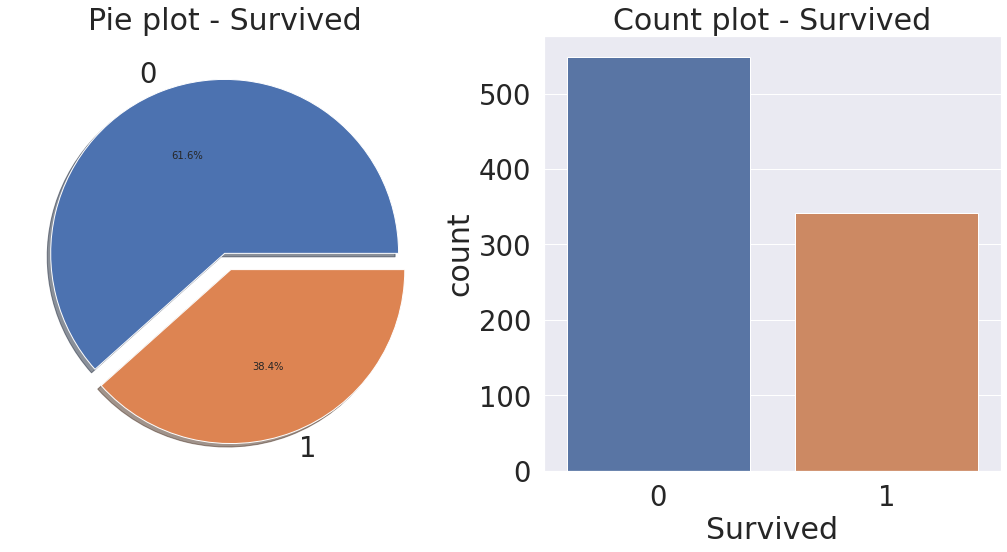

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

'''
df.plot.pie() 매개변수
ratio = [] : 원주율
labels = [] : 라벨
autopct='%.1f%%' : 부채꼴안에 표시될 숫자 형식 , 소수 첫째자리와 % 표시
strangle = : 부채꼴이 시작할 각도
counterclock = True/False : False일때 시계방향순서로 영역표시
explode=[] : 부채꼴이 중심으로부터 벗어나는거리
shadow = True/False : 그림자 유무
colors = [] : 색깔지정
wedgeprops = {} : 부채꼴 영역의 스타일 지정
'''

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## Pclass

In [ ]:
# pclass 그룹 별 데이터 카운트
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
# pclass 그룹 별 생존자 수 합
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
# mean을 사용하여 생존율 구하기
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


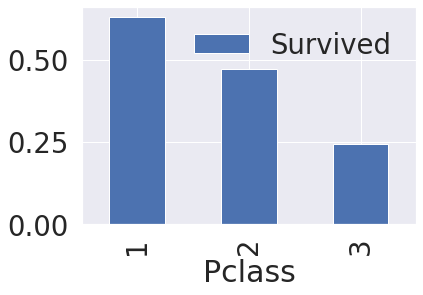

In [ ]:
# 시각화
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

결과 : Pclass에 따라 생존여부가 달라지는 것을 알 수 있다.

## Sex

성별에 따른 생존율 분석

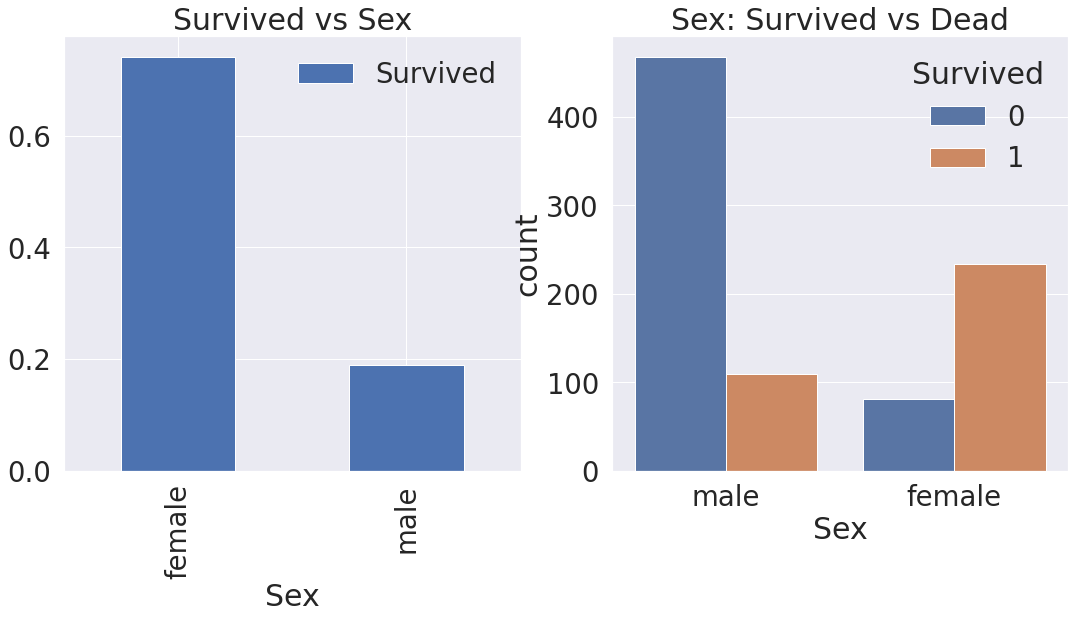

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

결과 : 여자의 생존율이 더욱 높은 것으로 보아 성별도 생존에 영향을 미치는 특성임을 알 수 있다.

## Pclass & Sex
Pclass와 성별에 따른 생존율 그래프

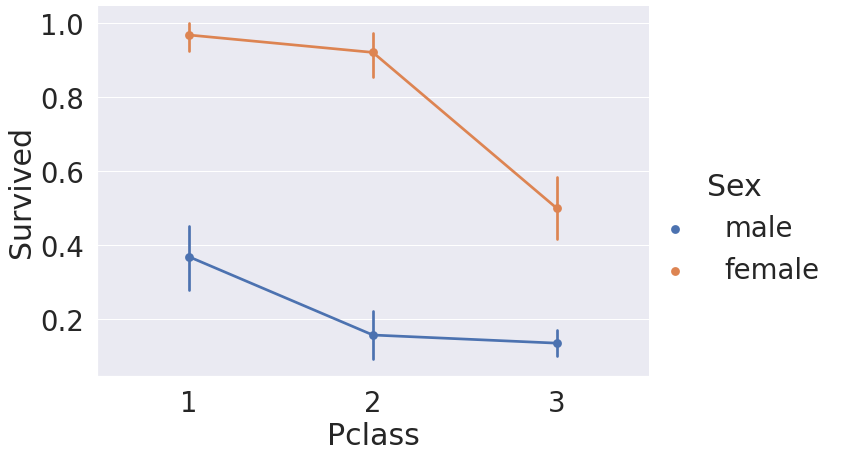

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

format() : 숫자 자릿수 , 딕셔너리 형태로 지정 {주소값:자릿수}


## Age

In [ ]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


### **kde**<br>
Kernel Density Estimator의 약자로 커널 밀도 추정이라는 뜻이다.<br>
데이터의 분포를 확인하기위하여 사용되고, 곡선으로 그려진다는 특징이 있다.

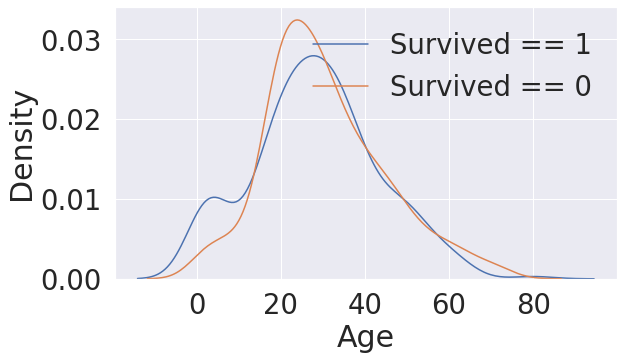

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

그래프를 보면 15세 미만의 구간에서 생존율이 상대적으로 높고<br>
20~30세 구간에서는 생존율이 낮은 것을 알 수 있다.

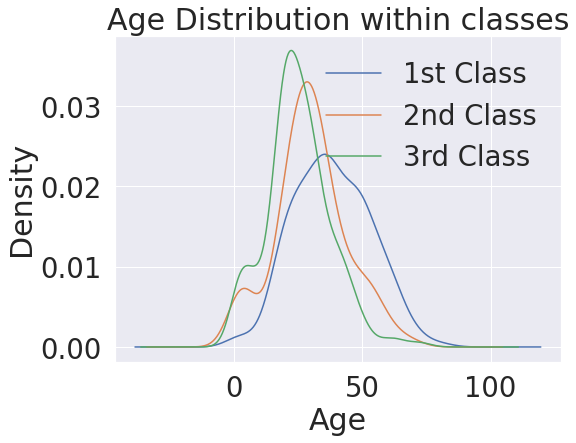

In [ ]:
# 나이에 따른 클래스별 분포
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

* 특징 <br>
나이가 많아질 수록 클래스가 높아진다<br>


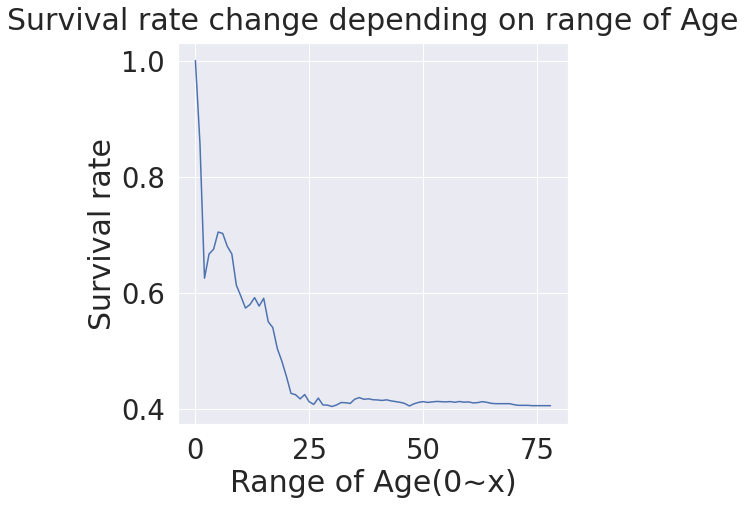

In [ ]:
# 누적확률을 이용하여 나이에 따른 생존율 시각화
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

결과 : 나이가 어릴수록 생존율이 높은것을 조금 더 확실하게 알 수 있다.

## Embarked (탑승항구)

In [ ]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

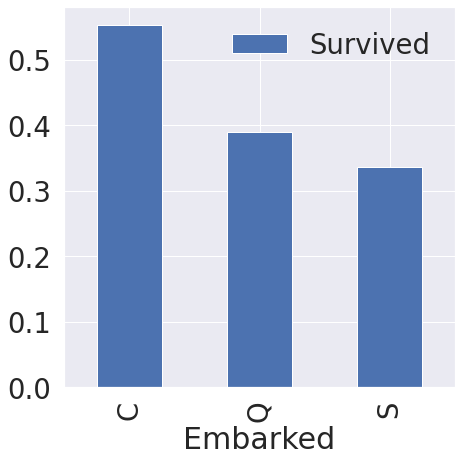

In [ ]:
# 탑승항구에 따른 생존율 그래프
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

결과 : 항구별 생존율의 차이가 크진않지만 나타나고 있는 것을 알 수 있고, C항구의 생존율이 가장 높았다.

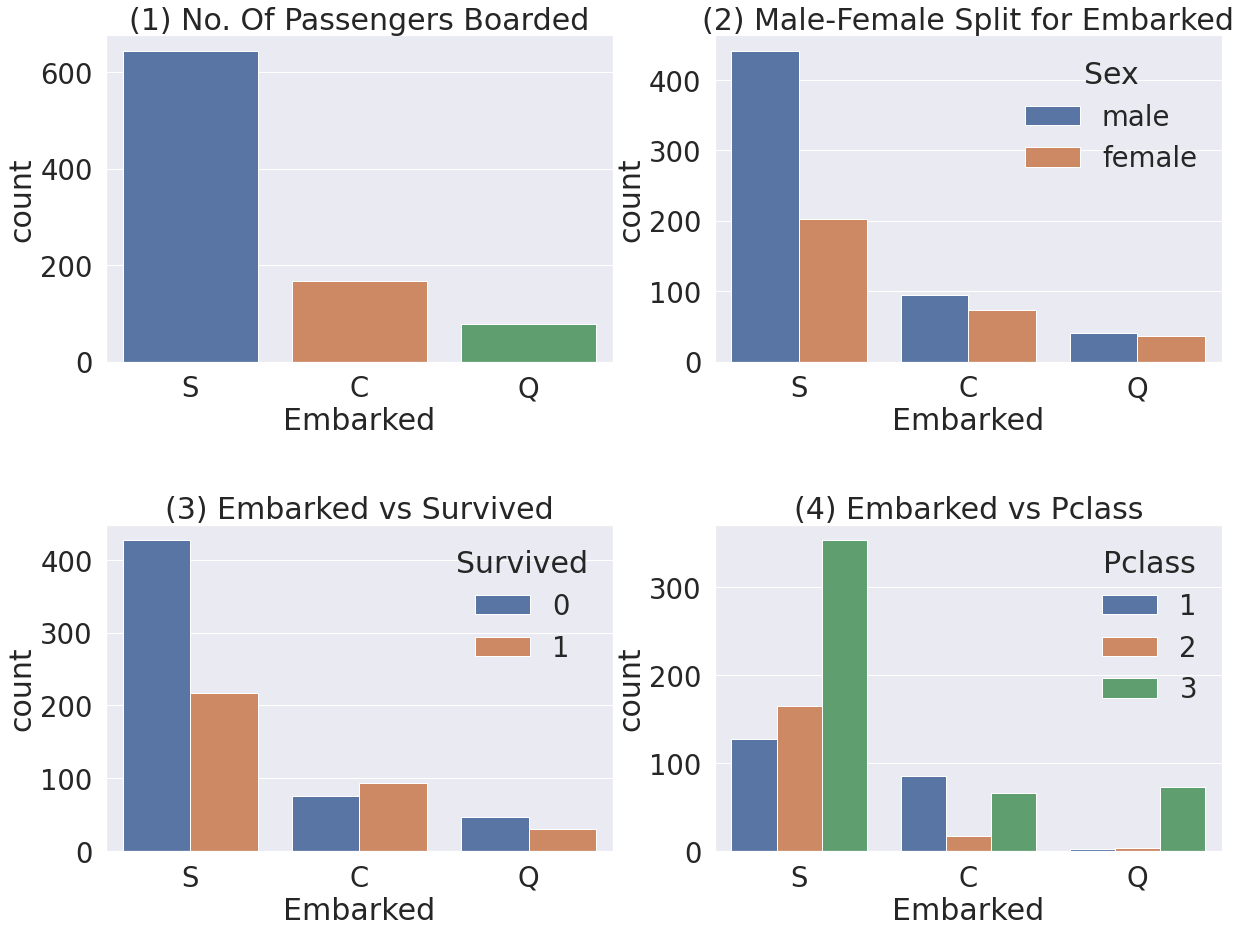

In [ ]:
'''
항구별 탑승자 수 그래프
성별로 나눈 항구별 탑승자 수 그래프
생존여부로 나눈 항구별 탑승자 수 그래프
클래스로 나눈 항구별 탑승자 수 그래프
'''
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* 결과 <br>
Fitcher(1) = S항구에서 가장 많은 사람들이 탑승했다.<br>
Fitcher(2) = S항구에서 남자의 비율이 더 많고 나머지는 비슷하다.<br>
Fitcher(3) = S항구에서 가장 생존율이 낮다. <br>
Fitcher(4) = C는 높은클래스의 사람이 많아서 생존율이 높은것으로 짐작되고, S항구는 낮은 클래스가 많아서 생존율이 낮은것으로 짐작된다.

## Family - Sibsp(형제 자매) + Parch(부모,자녀)

Sibsp 와 Parch를 합치면 함께 탑승한 가족의 수가 된다.<br>
이를 통해 FamilySize라는 새로운 피쳐를 생성한다.

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [ ]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


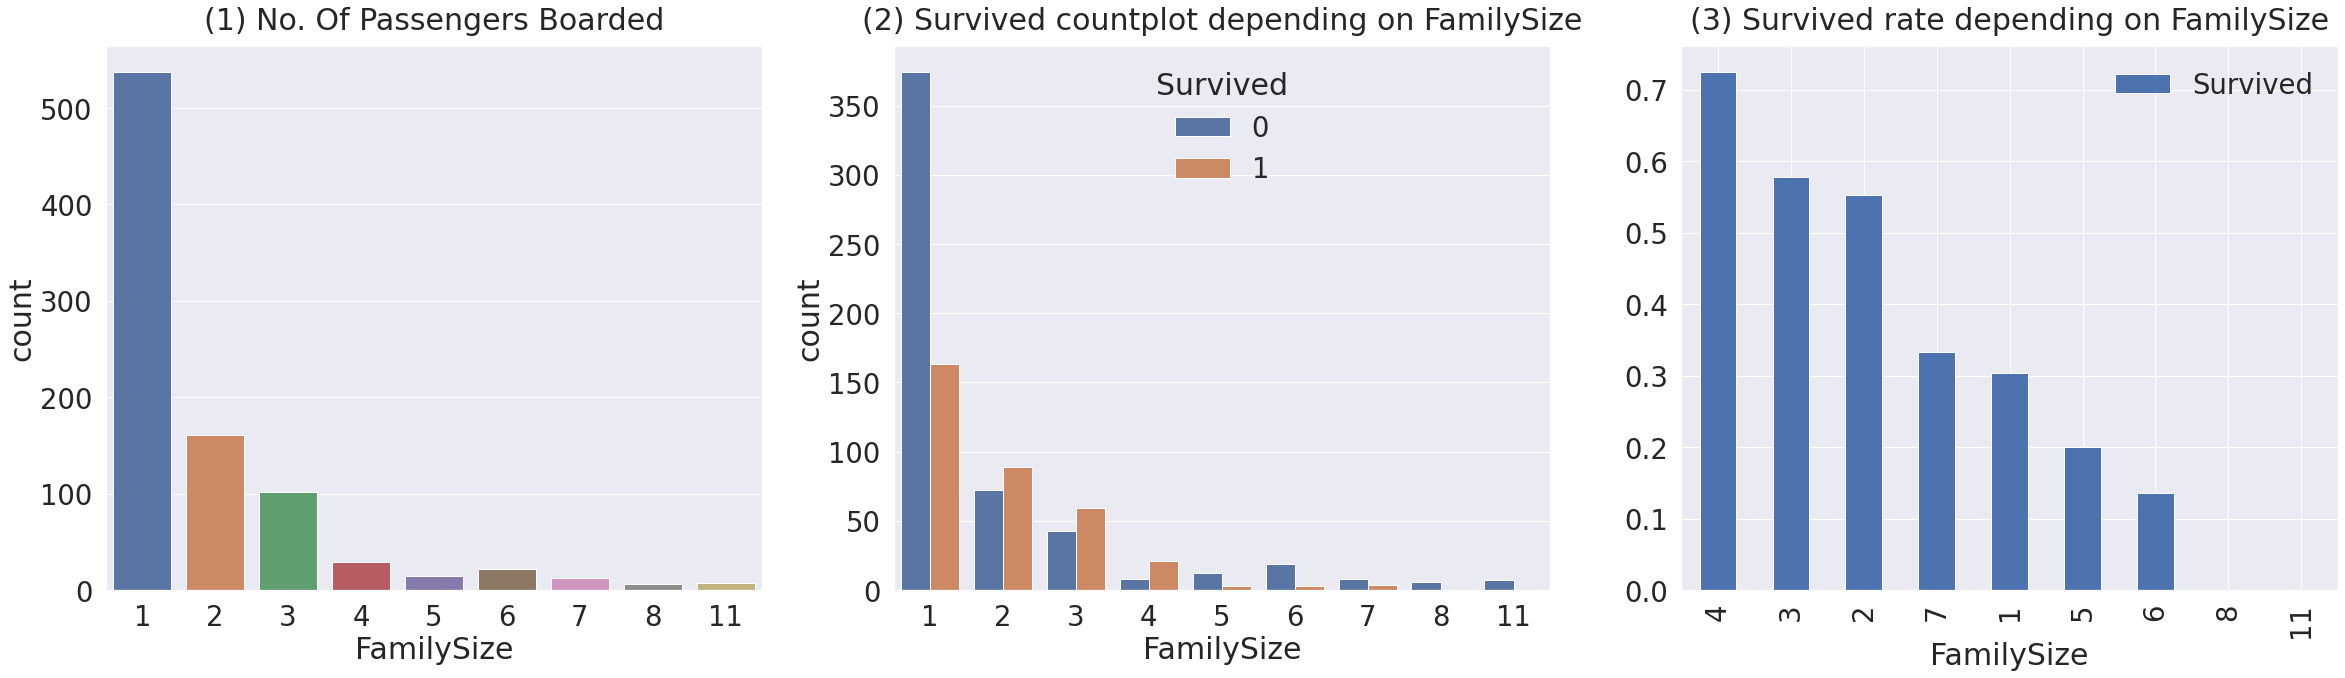

In [ ]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

# plt.subplots_adjust()은 서브플롯간 간격 변경함수
# wspace는 축 너비 , hspace는 높이 비율
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* 결과 <br>
Figure(1) - 가족의 크기가 1~11명까지 있다. 1명이 가장많고 그다음이 2,3,4명이다.<br>
Figure(2),(3) - 가족크기 별 생존여부이다. 생존확률로 보았을때 4명일때가 가장 확률이 높았다.

## Fare (탑승요금)

### skewness
비대칭도라는 뜻으로, 데이터의 분포가 한쪽으로 치우쳐져있는 정도를 의미한다.

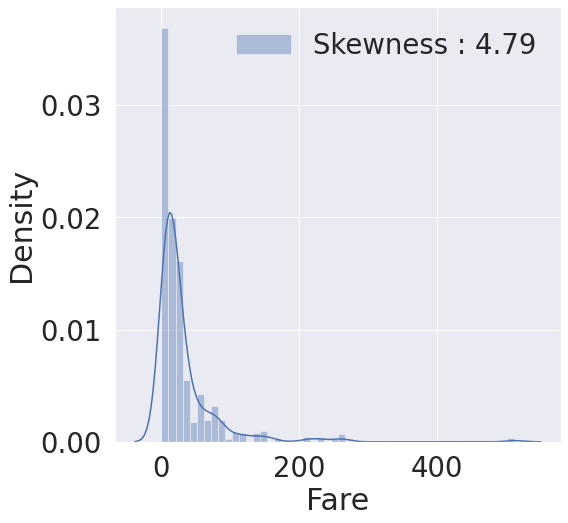

In [ ]:
# 히스토그램을 통해 데이터 분포를 확인한다.
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
# 레전드의 위치를 자동으로 최적의 위치하기위해서 loc='best'사용
g = g.legend(loc='best')

### FeatureEngineerning<br>
모델의 학습이나 성능을 높이기위해 피쳐들을 조작하거나 추가하는 것을 FeatureEngineering이라고한다.<br>
현재 모델에도 비대칭성이 높게 측정되기때문에 Fare에 log를 취해줌으로 비대칭성을 낮춰준다.

In [ ]:
# test데이터셋의 Fare피쳐에 null값이 한개 존재하기때문에 평균값으로 넣어준다.
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

152   NaN
Name: Fare, dtype: float64

In [ ]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

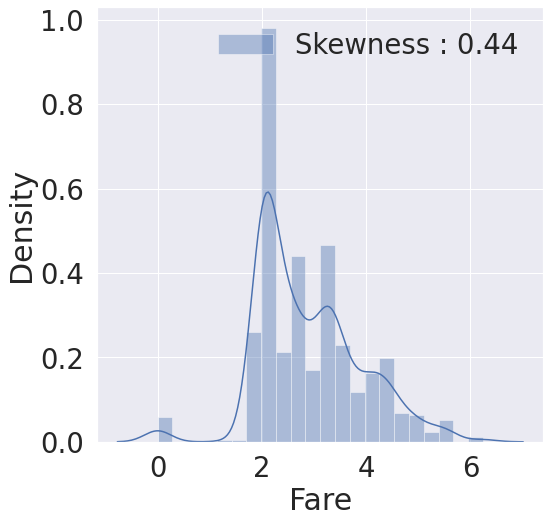

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## Cabin (좌석)
Cabin은 Nan이 약 80%이기 때문에, 활용에 적합하지 않다.

In [ ]:
### Cabin 피쳐의 Null 비율 계산
df_train["Cabin"].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [ ]:
df_train.head()[["PassengerId", "Cabin"]]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


## Ticket
Ticket에는 Nan은 없으나, 다양한 형태의 값들이 존재한다.<br>
실제 모델에 사용하기 위해서는 아이디어를 통해 일련의 작업들을 거쳐야 한다.

In [ ]:
df_train['Ticket'].value_counts()

CA. 2343    7
347082      7
1601        7
CA 2144     6
3101295     6
           ..
349257      1
349204      1
237565      1
PC 17597    1
350417      1
Name: Ticket, Length: 681, dtype: int64

# 특성 공학 (Feature Engineering)

## Fill Null

In [ ]:
df_train["Age"].isnull().sum()

177

In [ ]:
df_train["Na"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

### 정규표현식
문자열.extract()로 추출 <br>
() 안에는 추출원하는 문자열 형태 지정<br>
'([A-Za-z]+)\.' 는 A부터Z , a부터z까지 입력된문자 + .으로 끝나는 문자 추출

In [ ]:
df_train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [ ]:
# crosstab은 원하는 컬럼으로 교차표를 만들어주는 메소드
# .T를통해 행/열 변형
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [ ]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


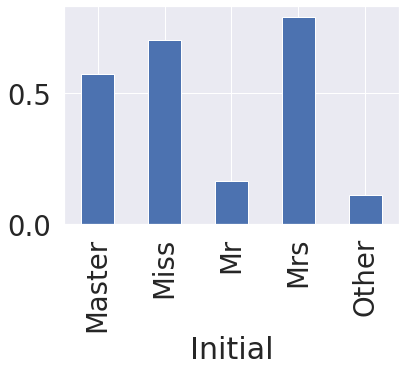

In [ ]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

Statistics를 활용하여 Null을 채운다.<br>
statistics 는 train data의 것을 의미

### 각 initial 그룹별 Age 평균 값으로 null 채우기

In [ ]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [ ]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [ ]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

* 결과 : train 과 test 셋에 Age의 null은 모두 없앴음

## Fill Null in Embarked

In [ ]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [ ]:
# 가장 많은 탑승객이 있었던 S항구로 null값 채우기
df_train['Embarked'].fillna('S', inplace=True)

In [ ]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin    687
dtype: int64

## Change Age

df.apply() 함수를 사용하여 나이별 카테고리 나누기 

In [ ]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [ ]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

## Change Initial, Embarked and Sex (string to numerical)